# Source dependent analysis: from DL1 to DL2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from lstchain.reco.dl1_to_dl2 import get_source_dependent_parameters
from lstchain.io import read_configuration_file, get_standard_config
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
import os
import joblib
from lstchain.reco import dl1_to_dl2

from gammapy.stats import WStatCountsStatistic
from lstchain.reco.utils import filter_events
from ctapipe.instrument import SubarrayDescription

In [2]:
from lstchain.io.io import(
    dl1_params_lstcam_key,
    dl1_params_src_dep_lstcam_key,
    dl2_params_lstcam_key,
    dl2_params_src_dep_lstcam_key,
    write_dataframe,
    get_srcdep_index_keys,
    get_srcdep_params
)

In [3]:
# Check package versions
import numpy as np
import lstchain

print("numpy:", np.__version__)
print("lstchain", lstchain.__version__)

numpy: 1.21.5
lstchain 0.8.4


## Configuration file

In [4]:
data_directory='/fefs/aswg/workspace/analysis-school-2022'
configuration_file=data_directory+"/srcdep/ex1/lstchain_src_dep_config.json"
config = read_configuration_file(configuration_file)
print(config['source_dependent'])

True


In [5]:
config['observation_mode'] = 'wobble'
config['n_off_wobble'] = 1
# You need to specify the source ra/dec if source names are not registerd in astropy
config['source_ra'] = 330.6803874 #[deg]
config['source_dec'] = 42.27777178 #[deg]

In [6]:
config['disp_regression_features']

['log_intensity',
 'width',
 'length',
 'wl',
 'skewness_from_source',
 'kurtosis',
 'time_gradient_from_source',
 'leakage_intensity_width_2',
 'dist']

In [7]:
config['disp_classification_features']

['log_intensity',
 'width',
 'length',
 'wl',
 'skewness_from_source',
 'kurtosis',
 'time_gradient_from_source',
 'leakage_intensity_width_2',
 'dist']

# EXERCISE 2a: DL1 to DL2 with source dependent params 

## Train new models with src-dependent config 

We first need to train new models using the source dependent configuration and the DL1 MC with the source dependent parameters

In [8]:
mc_file_g=data_directory+'/srcdep/ex2/ex2a/mc/dl1_gamma_20deg_180deg_run116___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono_off0.4.h5'
mc_file_p=data_directory+'/srcdep/ex2/ex2a/mc/dl1_proton_20deg_180deg_run1113___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5'

And define the output directory:

In [9]:
models_dir=data_directory+"/srcdep/ex2/ex2a/RF"

And now train new models with the previous information and the src-dependent configuration file:

In [10]:
dl1_to_dl2.build_models(mc_file_g,mc_file_p,save_models=True,path_models=models_dir,custom_config=config)

Data contains not-predictable events.
Column | Number of non finite values
length : 409
leakage_intensity_width_2 : 409
width : 409
dist : 409
wl : 409
time_gradient_from_source : 411
kurtosis : 409
skewness_from_source : 409
log_intensity : 409
Data contains not-predictable events.
Column | Number of non finite values
length : 68
leakage_intensity_width_2 : 68
width : 68
dist : 68
wl : 68
time_gradient_from_source : 68
kurtosis : 68
skewness_from_source : 68
log_intensity : 68
/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Given features:  ['log_intensity', 'width', 'length', 'wl', 'skewness_from_source', 'kurtosis', 'time_gradient_from_source', 'leakage_intensity_width_2', 'dist']
Number of events for training:  1680
Training Random Forest Regressor for Energy Reconstruction...
Model <class 'sklearn.ensemble._forest.RandomForestRegressor'> trained!
Given features:  ['log_intensity', 'width', 'length', 'wl', 'skewness_from_source', 'kurtosis', 'time_gradient_from_source', 'leakage_intensity_width_2', 'dist']
Number of events for training:  1680
Training model <class 'sklearn.ensemble._forest.RandomForestRegressor'> for disp norm regression


/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Model <class 'sklearn.ensemble._forest.RandomForestRegressor'> trained!
Given features:  ['log_intensity', 'width', 'length', 'wl', 'skewness_from_source', 'kurtosis', 'time_gradient_from_source', 'leakage_intensity_width_2', 'dist']
Number of events for training:  1680
Training model <class 'sklearn.ensemble._forest.RandomForestClassifier'> for disp sign classification
Model <class 'sklearn.ensemble._forest.RandomForestClassifier'> trained!
Given features:  ['log_intensity', 'width', 'length', 'wl', 'skewness_from_source', 'kurtosis', 'time_gradient_from_source', 'leakage_intensity_width_2', 'dist']
Number of events for training:  1344
Training Random Forest Regressor for Energy Reconstruction...


/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Model <class 'sklearn.ensemble._forest.RandomForestRegressor'> trained!
Given features:  ['log_intensity', 'width', 'length', 'wl', 'skewness_from_source', 'kurtosis', 'time_gradient_from_source', 'leakage_intensity_width_2', 'dist']
Number of events for training:  1344
Training model <class 'sklearn.ensemble._forest.RandomForestRegressor'> for disp norm regression


/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Model <class 'sklearn.ensemble._forest.RandomForestRegressor'> trained!
Given features:  ['log_intensity', 'width', 'length', 'wl', 'skewness_from_source', 'kurtosis', 'time_gradient_from_source', 'leakage_intensity_width_2', 'dist']
Number of events for training:  1344
Training model <class 'sklearn.ensemble._forest.RandomForestClassifier'> for disp sign classification
Model <class 'sklearn.ensemble._forest.RandomForestClassifier'> trained!
Given features:  ['log_intensity', 'width', 'length', 'wl', 'skewness_from_source', 'kurtosis', 'time_gradient_from_source', 'leakage_intensity_width_2', 'log_reco_energy', 'dist']
Number of events for training:  593
Training Random Forest Classifier for Gamma/Hadron separation...
Random Forest trained!


(RandomForestRegressor(criterion='mse', max_depth=50, min_samples_leaf=2,
                       n_estimators=150, n_jobs=4, random_state=42),
 RandomForestRegressor(criterion='mse', max_depth=50, min_samples_leaf=2,
                       n_estimators=150, n_jobs=4, random_state=42),
 RandomForestClassifier(max_depth=100, min_samples_leaf=2, n_jobs=4,
                        random_state=42, verbose=0.0),
 RandomForestClassifier(max_depth=100, min_samples_leaf=2, n_jobs=4,
                        random_state=42, verbose=0.0))

## Uploading new models

In [11]:
file_reg_energy = os.path.join(models_dir, 'reg_energy.sav')
file_cls_gh = os.path.join(models_dir, 'cls_gh.sav')
file_disp_norm = os.path.join(models_dir, 'reg_disp_norm.sav')
file_disp_sign = os.path.join(models_dir, 'cls_disp_sign.sav')

In [12]:
reg_disp_norm = joblib.load(file_disp_norm)
cls_disp_sign = joblib.load(file_disp_sign)
reg_energy = joblib.load(file_reg_energy)
cls_gh = joblib.load(file_cls_gh)

## Applying models to generate dl2 info (script=dl1_to_dl2.py)

In [13]:
dl1_filename = data_directory+'/srcdep/ex1/dl1_LST-1.Run05552.0149.h5'

In [14]:
config = read_configuration_file(configuration_file)

Read the DL1 src-dependent and src-independent parameters (using different keys):

In [15]:
dl1_srcindep_df = pd.read_hdf(dl1_filename, key=dl1_params_lstcam_key)
dl1_srcdep_df = pd.read_hdf(dl1_filename, key=dl1_params_src_dep_lstcam_key)
dl1_srcdep_df.columns = pd.MultiIndex.from_tuples([tuple(col[1:-1].replace('\'', '').replace(' ','').split(",")) for col in dl1_srcdep_df.columns])

In [16]:
dl1_srcdep_df

on                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0           0.180398      -0.064883  0.970443                 11.485294   
1           0.180398      -0.064883       NaN                       NaN   
2           0.180398      -0.064883       NaN                       NaN   
3           0.180398      -0.064883  0.666686                 20.103542   
4           0.180398      -0.064883  0.606630                  4.093378   
...              ...            ...       ...                       ...   
14818       0.180405      -0.064925  0.836779                -28.226982   
14819       0.180405      -0.064925  0.470005                 -2.337988   
14820       0.180405      -0.064925  1.099313                 18.380530   
14821       0.180405      -0.064925       NaN                       NaN   
14822       0.180405      -0.064925  1.126965                 -1.283719   

                                             off_180                           \
      skewness_from_source      alpha expected_src_x expected_src_y      dist   
0                 0.058270  58.486165      -0.180398       0.064883  0.892527   
1                      NaN        NaN      -0.180398       0.064883       NaN   
2                      NaN        NaN      -0.180398       0.064883       NaN   
3                 0.362379  43.830920      -0.180398       0.064883  0.988960   
4                 0.193092  12.249533      -0.180398       0.064883  0.877997   
...                    ...        ...            ...            ...       ...   
14818             0.032902  87.737477      -0.180405       0.064925  1.102120   
14819             0.449957  43.672735      -0.180405       0.064925  0.683474   
14820             0.500609  30.986101      -0.180405       0.064925  1.026893   
14821                  NaN        NaN      -0.180405       0.064925       NaN   
14822             0.952538  70.427019      -0.180405       0.064925  0.954352   

                                                                           
      time_gradient_from_source skewness_from_source      alpha off_angle  
0                     11.485294             0.058270  81.758373     180.0  
1                           NaN                  NaN        NaN     180.0  
2                           NaN                  NaN        NaN     180.0  
3                     20.103542             0.362379  29.132480     180.0  
4                      4.093378             0.193092   9.140396     180.0  
...                         ...                  ...        ...       ...  
14818                -28.226982             0.032902  71.162821     180.0  
14819                 -2.337988             0.449957  11.030355     180.0  
14820                 18.380530             0.500609  10.571626     180.0  
14821                       NaN                  NaN        NaN     180.0  
14822                 -1.283719             0.952538  51.422242     180.0  

[14823 rows x 13 columns]

Obtain information from telescope:

In [17]:
subarray_info = SubarrayDescription.from_hdf(dl1_filename)
tel_id = config["allowed_tels"][0] if "allowed_tels" in config else 1
focal_length = subarray_info.tel[tel_id].optics.equivalent_focal_length

In [18]:
focal_length

<Quantity 28. m>

In [19]:
dl1_srcdep_df

on                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0           0.180398      -0.064883  0.970443                 11.485294   
1           0.180398      -0.064883       NaN                       NaN   
2           0.180398      -0.064883       NaN                       NaN   
3           0.180398      -0.064883  0.666686                 20.103542   
4           0.180398      -0.064883  0.606630                  4.093378   
...              ...            ...       ...                       ...   
14818       0.180405      -0.064925  0.836779                -28.226982   
14819       0.180405      -0.064925  0.470005                 -2.337988   
14820       0.180405      -0.064925  1.099313                 18.380530   
14821       0.180405      -0.064925       NaN                       NaN   
14822       0.180405      -0.064925  1.126965                 -1.283719   

                                             off_180                           \
      skewness_from_source      alpha expected_src_x expected_src_y      dist   
0                 0.058270  58.486165      -0.180398       0.064883  0.892527   
1                      NaN        NaN      -0.180398       0.064883       NaN   
2                      NaN        NaN      -0.180398       0.064883       NaN   
3                 0.362379  43.830920      -0.180398       0.064883  0.988960   
4                 0.193092  12.249533      -0.180398       0.064883  0.877997   
...                    ...        ...            ...            ...       ...   
14818             0.032902  87.737477      -0.180405       0.064925  1.102120   
14819             0.449957  43.672735      -0.180405       0.064925  0.683474   
14820             0.500609  30.986101      -0.180405       0.064925  1.026893   
14821                  NaN        NaN      -0.180405       0.064925       NaN   
14822             0.952538  70.427019      -0.180405       0.064925  0.954352   

                                                                           
      time_gradient_from_source skewness_from_source      alpha off_angle  
0                     11.485294             0.058270  81.758373     180.0  
1                           NaN                  NaN        NaN     180.0  
2                           NaN                  NaN        NaN     180.0  
3                     20.103542             0.362379  29.132480     180.0  
4                      4.093378             0.193092   9.140396     180.0  
...                         ...                  ...        ...       ...  
14818                -28.226982             0.032902  71.162821     180.0  
14819                 -2.337988             0.449957  11.030355     180.0  
14820                 18.380530             0.500609  10.571626     180.0  
14821                       NaN                  NaN        NaN     180.0  
14822                 -1.283719             0.952538  51.422242     180.0  

[14823 rows x 13 columns]

Create DL2 dictionary applying models:

In [20]:
dl2_srcdep_dict={}
for i, k in enumerate (dl1_srcdep_df.columns.levels[0]):
    data_with_srcdep_param = pd.concat([dl1_srcindep_df, dl1_srcdep_df[k]], axis=1)
    data_with_srcdep_param = filter_events(data_with_srcdep_param,filters=config["events_filters"],finite_params=config['energy_regression_features']
                                                   + config['disp_regression_features']+ config['particle_classification_features']
                                                   + config['disp_classification_features'],
                                                   )
    
    dl2_df = dl1_to_dl2.apply_models(data_with_srcdep_param, cls_gh, reg_energy, reg_disp_norm = reg_disp_norm, 
                                                 cls_disp_sign = cls_disp_sign, focal_length = focal_length, custom_config = config)
    
    dl2_srcdep = dl2_df.drop(dl1_srcindep_df.keys(), axis=1)
    dl2_srcdep_dict[k] = dl2_srcdep
    if i == 0:
        dl2_srcindep = dl2_df.drop(dl1_srcdep_df[k].keys(), axis=1)

Data contains not-predictable events.
Column | Number of non finite values
length : 5132
leakage_intensity_width_2 : 5132
width : 5132
dist : 5132
wl : 5132
time_gradient_from_source : 5162
kurtosis : 5132
skewness_from_source : 5132
log_intensity : 5132
/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/ctapipe/coordinates/__init__.py:44: MissingFrameAttributeWarning: AltAz coordinate has no obstime, assuming same frame
  warnings.warn(
/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/ctapipe/coordinates/__init__.py:52: MissingFrameAttributeWarning: Horizontal coordinate has no location, assuming same frame
  warnings.warn(
/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/ctapipe/coordinates/__init__.py:44: MissingFrameAttributeWarning: AltAz coordinate has no obstime, assuming same frame
  warnings.warn(
/Users/alvarom/miniconda3/envs/lst-school-2022-01/lib/python3.8/site-packages/ctapipe/coordinates

There are multiple dataframes and therefore multiples DL2 parameters for a single event (multiple gammaness, multiple alpha, multiple reco energy,...). For instance, for the 'on' position:

In [21]:
dl2_srcdep_dict['on']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha,log_reco_energy,reco_energy,reco_disp_norm,reco_disp_sign,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness
0,0.180398,-0.064883,0.970443,11.485294,0.058270,58.486165,-0.511429,0.308014,0.970081,1.0,0.855103,-0.458100,0.979051,0.445817,11.485294,0.058270,1.115882,0.957388,0,0.622667
3,0.180398,-0.064883,0.666686,20.103542,0.362379,43.830920,-1.034426,0.092379,0.667896,1.0,0.639293,-0.193363,1.146367,-0.839412,-20.103542,-0.362379,1.121200,0.852200,101,0.433500
4,0.180398,-0.064883,0.606630,4.093378,0.193092,12.249533,-1.072820,0.084563,0.607263,1.0,0.552144,0.252796,1.217974,0.551721,-4.093378,-0.193092,1.124273,0.966766,101,0.423000
5,0.180398,-0.064883,1.062378,-10.415300,0.104676,73.912795,-0.315334,0.483800,1.062787,1.0,1.010677,0.328710,1.155310,1.325602,10.415300,-0.104676,1.120158,1.029948,101,0.040000
6,0.180398,-0.064883,0.859241,-7.829452,0.191348,29.858718,-1.009064,0.097934,0.858823,1.0,0.010965,-0.858753,-0.226873,-1.674218,7.829452,-0.191348,1.069775,0.796436,101,0.095595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14817,0.180405,-0.064925,1.113805,-1.590927,-0.129453,88.976789,-0.048108,0.895143,1.122628,1.0,1.119996,-0.076837,1.396465,0.967892,1.590927,0.129453,1.129922,1.002062,101,0.048333
14818,0.180405,-0.064925,0.836779,-28.226982,0.032902,87.737477,0.055408,1.136076,0.836820,1.0,0.509915,-0.663516,1.373417,-0.245141,28.226982,-0.032902,1.130255,0.900577,101,0.021667
14819,0.180405,-0.064925,0.470005,-2.337988,0.449957,43.672735,-1.677333,0.021022,0.469996,-1.0,-0.462033,-0.086153,-0.006928,0.230295,-2.337988,0.449957,1.080973,0.938567,0,0.778238
14820,0.180405,-0.064925,1.099313,18.380530,0.500609,30.986101,-0.046314,0.898848,1.097389,1.0,0.546373,0.951703,0.705176,1.985879,-18.380530,-0.500609,1.101540,1.078385,101,0.338762


And for the off position at 180 degrees:

In [22]:
dl2_srcdep_dict['off_180']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha,off_angle,log_reco_energy,reco_energy,reco_disp_norm,...,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness
0,-0.180398,0.064883,0.892527,11.485294,0.058270,81.758373,180.0,-0.747181,0.178986,0.893290,...,0.787414,-0.421837,0.911362,0.482080,11.485294,0.058270,1.113423,0.960143,0,0.661833
3,-0.180398,0.064883,0.988960,20.103542,0.362379,29.132480,180.0,-0.457676,0.348597,0.988943,...,0.946591,-0.286309,1.453665,-0.932358,-20.103542,-0.362379,1.131936,0.842841,101,0.450167
4,-0.180398,0.064883,0.877997,4.093378,0.193092,9.140396,180.0,-0.899856,0.125934,0.877509,...,0.797860,0.365295,1.463690,0.664221,-4.093378,-0.193092,1.132860,0.977054,101,0.153333
5,-0.180398,0.064883,0.987060,-10.415300,0.104676,52.757711,180.0,-0.603691,0.249063,0.987174,...,-0.938771,-0.305323,-0.794138,0.691570,-10.415300,0.104676,1.052266,0.970998,101,0.042500
6,-0.180398,0.064883,0.882220,-7.829452,0.191348,4.464521,180.0,-1.035300,0.092193,0.882944,...,0.011273,-0.882872,-0.226565,-1.698337,7.829452,-0.191348,1.069691,0.794651,101,0.078929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14817,-0.180405,0.064925,1.081088,-1.590927,-0.129453,68.925357,180.0,-0.203500,0.625892,1.081950,...,1.079413,-0.074053,1.355882,0.970677,1.590927,0.129453,1.128469,1.002051,101,0.046667
14818,-0.180405,0.064925,1.102120,-28.226982,0.032902,71.162821,180.0,0.132602,1.357068,1.096692,...,0.668268,-0.869569,1.531770,-0.451194,28.226982,-0.032902,1.135718,0.882902,101,0.000000
14819,-0.180405,0.064925,0.683474,-2.337988,0.449957,11.030355,180.0,-1.175304,0.066788,0.683465,...,-0.671884,-0.125283,-0.216779,0.191165,-2.337988,0.449957,1.073498,0.935396,101,0.207000
14820,-0.180405,0.064925,1.026893,18.380530,0.500609,10.571626,180.0,-0.215234,0.609208,1.025527,...,0.510594,0.889381,0.669397,1.923557,-18.380530,-0.500609,1.100576,1.073131,0,0.527833


# EXERCISE 2b



## Read DL2 files with source dependent parameters

In [23]:
dl2_fname=data_directory+'/srcdep/ex2/ex2b/dl2_LST-1.Run05558_cutted.h5'

Again, use the dl2_params_src_dep_lstcam_key to get the src-dependent parameters

In [24]:
srcindep_df=pd.read_hdf(dl2_fname,key=dl2_params_lstcam_key,float_precision=20)
srcdep_df=pd.read_hdf(dl2_fname,key=dl2_params_src_dep_lstcam_key)

In [25]:
srcdep_df

,"('off_180', 'expected_src_x')","('off_180', 'expected_src_y')","('off_180', 'dist')","('off_180', 'time_gradient_from_source')","('off_180', 'skewness_from_source')","('off_180', 'alpha')","('off_180', 'off_angle')","('off_180', 'log_reco_energy')","('off_180', 'reco_energy')","('off_180', 'reco_disp_norm')",...,"('on', 'reco_disp_dx')","('on', 'reco_disp_dy')","('on', 'reco_src_x')","('on', 'reco_src_y')","('on', 'signed_time_gradient')","('on', 'signed_skewness')","('on', 'reco_alt')","('on', 'reco_az')","('on', 'reco_type')","('on', 'gammaness')"
0,-0.076091,0.177818,0.229724,-6.383715,-0.022642,83.935149,180.0,-0.393070,0.404511,0.229723,...,-0.132126,-0.088116,-0.101663,-0.113816,6.383715,0.022642,1.311169,0.333847,101,0.012500
1,-0.076091,0.177818,0.378011,2.736739,0.110591,21.616521,180.0,-1.541434,0.028745,0.378011,...,0.005529,0.051592,0.030455,-0.134854,2.736739,0.110591,1.315874,0.330581,101,0.486500
2,-0.076091,0.177818,1.128782,0.831038,-0.086161,89.698978,180.0,0.006150,1.014262,1.128798,...,-0.818976,0.131543,-1.079929,-0.804181,-0.831038,0.086161,1.274891,0.251117,101,0.000000
3,-0.076091,0.177818,0.828330,-1.751124,0.304538,22.192421,180.0,-0.618786,0.240555,0.828330,...,1.137641,-0.319976,0.407943,0.366692,-1.751124,0.304538,1.329053,0.404406,101,0.000000
4,-0.076091,0.177818,0.885489,-6.288078,-0.272399,40.208814,180.0,0.818935,6.590746,0.885488,...,0.999583,0.686105,1.157534,1.717922,6.288078,0.272399,1.347793,0.630362,101,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349791,-0.073305,0.180032,0.493670,0.611852,0.115781,42.059015,180.0,-1.311599,0.048798,0.493670,...,-0.347353,-0.148544,0.046381,-0.128463,0.611852,0.115781,1.318035,0.316845,0,0.539333
349792,-0.073305,0.180032,1.067927,0.597887,-0.432323,20.777440,180.0,-0.414042,0.385441,1.067921,...,0.868876,0.752468,-0.207211,0.565217,0.597887,-0.432323,1.308259,0.413043,101,0.010000
349793,-0.073305,0.180032,0.790108,-9.398758,1.124547,38.659670,180.0,-1.090777,0.081138,0.790108,...,0.145112,0.986233,0.649938,1.704815,9.398758,-1.124547,1.331932,0.595223,101,0.008667
349794,-0.073305,0.180032,0.924678,2.312775,-0.424417,70.039679,180.0,-0.398312,0.399658,0.924680,...,1.139172,-0.310345,1.598876,0.625287,-2.312775,0.424417,1.372297,0.448485,101,0.000000


And we can join the info from the standard params and the source-dependent params for a position (for instance, 'on' position)


In [26]:
on_df_srcdep=get_srcdep_params(dl2_fname,'on')

In [27]:
df = pd.concat([srcindep_df, on_df_srcdep], axis=1)

In [28]:
df

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,width,...,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness
0,5558,1,5086.557557,3.706424,0.030463,-0.025699,0.039855,-0.700783,1.214632,1.046718e+00,...,-0.132126,-0.088116,-0.101663,-0.113816,6.383715,0.022642,1.311169,0.333847,101,0.012500
1,5558,2,85.380048,1.931356,0.024926,-0.186446,0.188104,-1.437892,0.064511,3.483726e-02,...,0.005529,0.051592,0.030455,-0.134854,2.736739,0.110591,1.315874,0.330581,101,0.486500
2,5558,3,845.238073,2.926979,-0.260952,-0.935724,0.971429,-1.842764,0.372125,8.767835e-02,...,-0.818976,0.131543,-1.079929,-0.804181,-0.831038,0.086161,1.274891,0.251117,101,0.000000
3,5558,6,307.602471,2.487990,-0.729697,0.686669,1.001984,2.386565,0.121694,7.360783e-02,...,1.137641,-0.319976,0.407943,0.366692,-1.751124,0.304538,1.329053,0.404406,101,0.000000
4,5558,7,155.814831,2.192609,0.157951,1.031817,1.043837,1.418895,0.094867,4.832542e-02,...,0.999583,0.686105,1.157534,1.717922,6.288078,0.272399,1.347793,0.630362,101,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349791,5558,529993,71.062262,1.851639,0.393734,0.020081,0.394245,0.050957,0.111350,4.268176e-02,...,-0.347353,-0.148544,0.046381,-0.128463,0.611852,0.115781,1.318035,0.316845,0,0.539333
349792,5558,529996,33.454978,1.524461,-1.076087,-0.187250,1.092258,-2.969307,0.085501,6.200081e-08,...,0.868876,0.752468,-0.207211,0.565217,0.597887,-0.432323,1.308259,0.413043,101,0.010000
349793,5558,529997,43.816289,1.641636,0.504826,0.718582,0.878185,0.958374,0.064124,4.046438e-02,...,0.145112,0.986233,0.649938,1.704815,9.398758,-1.124547,1.331932,0.595223,101,0.008667
349794,5558,529998,124.630867,2.095626,0.459704,0.935631,1.042465,1.114109,0.629379,7.819230e-02,...,1.139172,-0.310345,1.598876,0.625287,-2.312775,0.424417,1.372297,0.448485,101,0.000000


And for the off position

In [29]:
off_df_srcdep=get_srcdep_params(dl2_fname,'off_180')

In [30]:
df_off= pd.concat([srcindep_df, off_df_srcdep], axis=1)

In [31]:
df_off

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,width,...,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness
0,5558,1,5086.557557,3.706424,0.030463,-0.025699,0.039855,-0.700783,1.214632,1.046718e+00,...,-0.191120,-0.127460,-0.160657,-0.153159,6.383715,0.022642,1.309037,0.328543,101,0.002500
1,5558,2,85.380048,1.931356,0.024926,-0.186446,0.188104,-1.437892,0.064511,3.483726e-02,...,0.040279,0.375859,0.065206,0.189413,2.736739,0.110591,1.317071,0.376635,101,0.422667
2,5558,3,845.238073,2.926979,-0.260952,-0.935724,0.971429,-1.842764,0.372125,8.767835e-02,...,1.114513,-0.179011,0.853561,-1.114735,0.831038,-0.086161,1.341913,0.173430,101,0.000000
3,5558,6,307.602471,2.487990,-0.729697,0.686669,1.001984,2.386565,0.121694,7.360783e-02,...,-0.797390,0.224276,-1.527087,0.910945,1.751124,-0.304538,1.258623,0.455632,101,0.000000
4,5558,7,155.814831,2.192609,0.157951,1.031817,1.043837,1.418895,0.094867,4.832542e-02,...,-0.730057,-0.501105,-0.572107,0.530713,-6.288078,-0.272399,1.293762,0.419019,101,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349791,5558,529993,71.062262,1.851639,0.393734,0.020081,0.394245,0.050957,0.111350,4.268176e-02,...,-0.453906,-0.194111,-0.060172,-0.174030,0.611852,0.115781,1.314197,0.310700,101,0.469333
349792,5558,529996,33.454978,1.524461,-1.076087,-0.187250,1.092258,-2.969307,0.085501,6.200081e-08,...,0.807273,0.699118,-0.268815,0.511867,0.597887,-0.432323,1.306200,0.405145,101,0.021667
349793,5558,529997,43.816289,1.641636,0.504826,0.718582,0.878185,0.958374,0.064124,4.046438e-02,...,0.115016,0.781691,0.619842,1.500273,9.398758,-1.124547,1.332599,0.564107,101,0.042833
349794,5558,529998,124.630867,2.095626,0.459704,0.935631,1.042465,1.114109,0.629379,7.819230e-02,...,0.892165,-0.243053,1.351869,0.692579,-2.312775,0.424417,1.363261,0.455373,101,0.000000


## Apply cuts

Make cuts in gammaness and intensity

In [32]:
df_cutted=df[(df.gammaness>0.9) & (df.intensity>50)]
df_cutted_off=df_off[(df_off.gammaness>0.9) & (df_off.intensity>50)]

And we can draw now the alpha distribution and the signal. With src-dependent analysis we use alpha to extract the signal

## Draw the alpha distributions and extract the signal

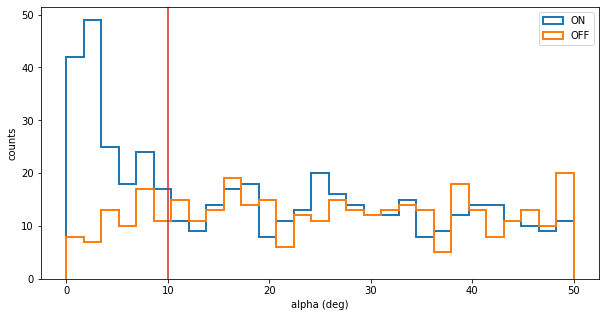

In [33]:
plt.figure(figsize=(10,5))
plt.hist(df_cutted.alpha,bins=np.linspace(0,50,30),histtype='step',linewidth=2,label='ON')
plt.hist(df_cutted_off.alpha,bins=np.linspace(0,50,30),histtype='step',linewidth=2,label='OFF')
plt.axvline(x=10,color='tab:red')
plt.xlabel('alpha (deg)')
plt.ylabel('counts')
plt.legend()

In [34]:
n_on=len(df_cutted[df_cutted.alpha<10])
n_off=len(df_cutted_off[(df_cutted_off.alpha<10)])

Non_norm= np.sum((df_cutted.alpha>20) & (df_cutted.alpha<60))
Noff_norm= np.sum((df_cutted_off.alpha>20) & (df_cutted_off.alpha< 60))
alpha=Non_norm/Noff_norm
print('alpha value is: '+str(alpha))

stats=WStatCountsStatistic(n_on, n_off,alpha=alpha)
print('Significance (sigmas): '+str(stats.sqrt_ts))

alpha value is: 1.0148148148148148
Significance (sigmas): 7.172579343739279
